In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
file_path = '/content/drive/My Drive/gpt-4.csv'
print(os.path.exists(file_path))

True


In [ ]:
df=pd.read_csv(file_path, on_bad_lines='skip', nrows=3000)

In [ ]:
df.head()

,data,conversation
0,This 60-year-old male was hospitalized due to ...,"Doctor: Good morning, how are you feeling toda..."
1,A 39-year-old man was hospitalized due to an i...,"Doctor: Hello, how are you feeling today?\nPat..."
2,One week after a positive COVID-19 result this...,"Doctor: Hello, how are you feeling today?\nPat..."
3,This 69-year-old male was admitted to the ICU ...,"Doctor: Hello, how are you feeling today?\nPat..."
4,This 57-year-old male was admitted to the ICU ...,"Doctor: Good morning, how are you feeling toda..."


In [ ]:
sample = df.sample(n=1000, random_state=42)
sample

,data,conversation
1801,The third case was a 64-year-old female who ad...,"Doctor: Good afternoon, how are you feeling to..."
1190,A 34-year-old woman presented with severe epis...,"Doctor: Good morning, how can I help you today..."
1817,"A 53-year-old man, who had non-exertional ches...","Doctor: Hello, Mr. Johnson. How are you feelin..."
251,"A 34 year old woman from the east of Morocco, ...","Doctor: Good afternoon, Mrs. X. I see here in ..."
2505,A 19-year-old male of Caucasian origin was adm...,"Doctor: Hello, how are you feeling today?\nPat..."
...,...,...
618,A ten-year-old neutered female Cavalier King C...,"Doctor: Hello, how are you today?\nPatient: I'..."
406,A 65-year-old man with continuous irritable co...,"Doctor: Good morning, Mr. Johnson. How are you..."
1157,A 55-year-old woman without relevant medical h...,"Doctor: Hi, how are you feeling today?\nPatien..."
1068,A 52-year-old man was first diagnosed with HIV...,"Doctor: Hi there, how are you feeling today?\n..."


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

nlp=spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

def tokenize_text(text):
  """Tokenize text"""
  return word_tokenize(text)

def stopword_removal(tokens):
  """Removing stop words"""
  stop_words = set(stopwords.words('english'))
  return [word for word in tokens if word not in stop_words]

def lemma_text(tokens):
  """lemmatize tokens"""
  doc = nlp(" ".join(tokens))
  return [token.lemma_ for token in doc if token.lemma_ != "-PRON-"]

def preprocess_text(text):
  text = clean_text(text)
  tokens = tokenize_text(text)
  tokens = stopword_removal(tokens)
  tokens = lemma_text(tokens)
  return " ".join(tokens)

sample['preprossed_text'] = ""
sample['preprossed_text'] = sample['conversation'].astype(str).apply(preprocess_text)

In [ ]:
# Calculating term frequencies:

tf_data = sample["data"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf_data.columns = ["words", "tf"]
tf_data.sort_values("tf", ascending=False)

<ipython-input-11-d08f37a3e45a>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf_data = sample["data"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-11-d08f37a3e45a>:3: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf_data = sample["data"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-11-d08f37a3e45a>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf_data = sample["data"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-11-d08f37a3e45a>:3: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a 

,words,tf
2,the,11490.0
0,and,9770.0
40,of,9012.0
1,was,7648.0
44,a,5200.0
...,...,...
17651,disease.\nThe,1.0
17649,"mind,",1.0
17648,inlet,1.0
17647,glottic,1.0


In [ ]:
# Calculating term frequencies:

tf_convo = sample["preprossed_text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf_convo.columns = ["words", "tf"]
tf_convo.sort_values("tf", ascending=False)

<ipython-input-12-b6b949a469a2>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf_convo = sample["preprossed_text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-12-b6b949a469a2>:3: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf_convo = sample["preprossed_text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-12-b6b949a469a2>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf_convo = sample["preprossed_text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
<ipython-input-12-b6b949a469a2>:3: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarra

,words,tf
33,yes,2870.0
75,see,2337.0
16,okay,2289.0
36,doctor,2054.0
7,s,1863.0
...,...,...
9155,corddoctor,1.0
9154,paratonicdoctor,1.0
9153,craniospinal,1.0
9152,mildtomoderate,1.0


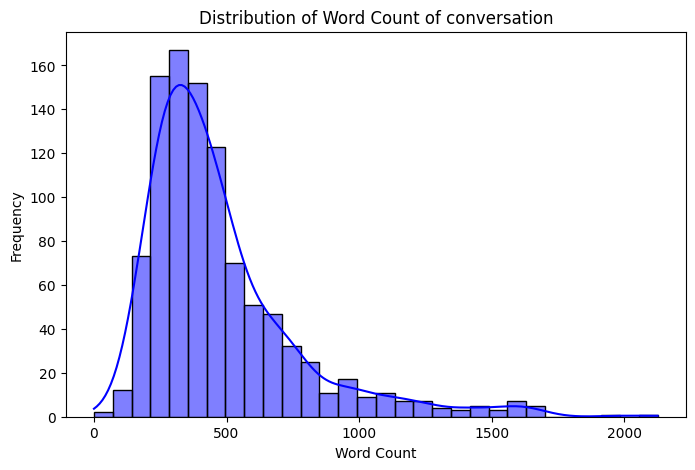

,patient_conversation,word_count
1801,"Hmm, not great actually. I'm having some chest...",228
1190,"Hi, I have been experiencing severe headaches ...",369
1817,"I'm feeling okay, doctor. Yes, that's right. N...",135
251,"Yes, doctor. That's right. Okay. Oh no. What d...",113
2505,"I'm doing alright, thank you. Yeah, I was in a...",428


In [ ]:
import seaborn as sns

sample['word_count'] = sample['patient_conversation'].apply(len)

# Plot the distribution of word count
plt.figure(figsize=(8, 5))
sns.histplot(sample['word_count'], kde=True, color='blue', bins=30)
plt.title("Distribution of Word Count of conversation")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

sample[['patient_conversation', 'word_count']].head()

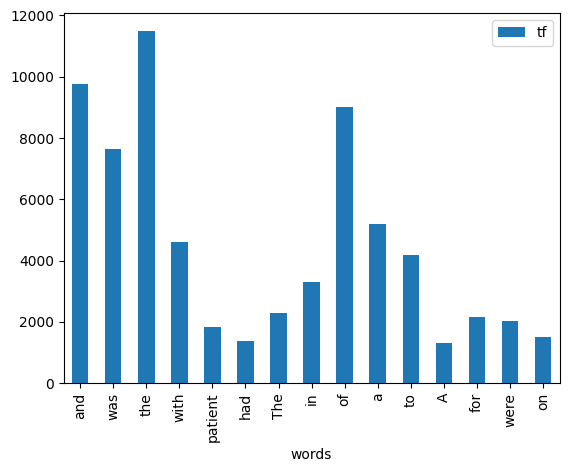

In [ ]:
import matplotlib.pyplot as plt
# Barplot for data

tf_data[tf_data["tf"] > 1200].plot.bar(x="words", y="tf")
plt.show()

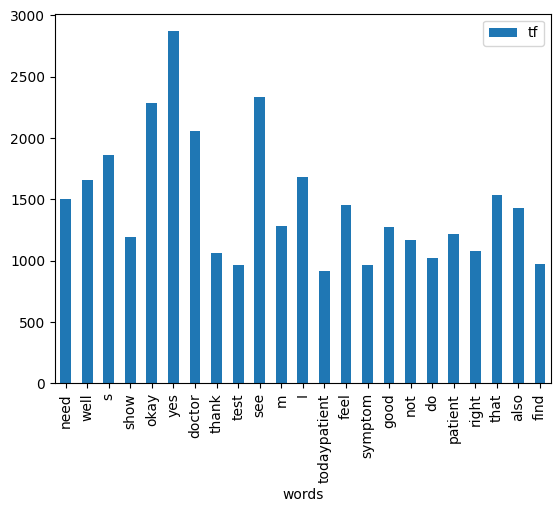

In [ ]:
# Barplot for conversation

tf_convo[tf_convo["tf"] > 900].plot.bar(x="words", y="tf")
plt.show()

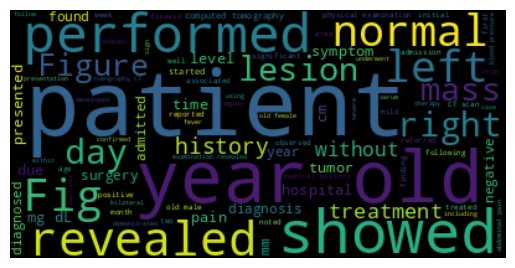

In [ ]:
from wordcloud import WordCloud
# Wordcloud for data

text_data = " ".join(i for i in sample.data)

wordcloud = WordCloud().generate(text_data)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

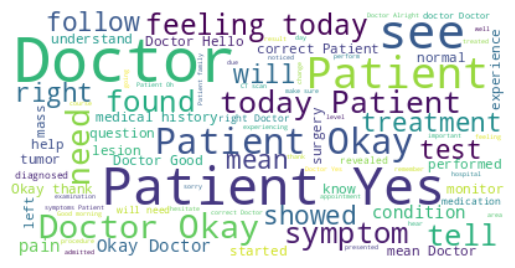

In [ ]:
# Wordcloud for conversation

text_convo = " ".join(i for i in sample.conversation)

wordcloud_convo = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text_convo)
plt.figure()
plt.imshow(wordcloud_convo, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# seperating doctor patient dialogue from conversation

def seperate_convo(conversation):
  doctor_dia = []
  patient_dia =[]

  lines = conversation.split("\n")

  for line in lines:
    if line.startswith("Doctor:"):
      doctor_dia.append(line[len("Doctor:"):].strip())
    elif line.startswith("Patient:"):
      patient_dia.append(line[len("Patient:"):].strip())

  return " ".join(doctor_dia), " ".join(patient_dia)

sample[['doctor_conversation','patient_conversation']]=sample['conversation'].apply(lambda x: pd.Series(seperate_convo(x)))

In [ ]:
sample.head()

,data,conversation,preprossed_text,doctor_conversation,patient_conversation
1801,The third case was a 64-year-old female who ad...,"Doctor: Good afternoon, how are you feeling to...",doctor good afternoon feel todaypatient hmm gr...,"Good afternoon, how are you feeling today? Oka...","Hmm, not great actually. I'm having some chest..."
1190,A 34-year-old woman presented with severe epis...,"Doctor: Good morning, how can I help you today...",doctor good morning help todaypatient hi exper...,"Good morning, how can I help you today? When d...","Hi, I have been experiencing severe headaches ..."
1817,"A 53-year-old man, who had non-exertional ches...","Doctor: Hello, Mr. Johnson. How are you feelin...",doctor hello mr johnson feel todaypatient I m ...,"Hello, Mr. Johnson. How are you feeling today?...","I'm feeling okay, doctor. Yes, that's right. N..."
251,"A 34 year old woman from the east of Morocco, ...","Doctor: Good afternoon, Mrs. X. I see here in ...",doctor good afternoon mrs x see medical record...,"Good afternoon, Mrs. X. I see here in your med...","Yes, doctor. That's right. Okay. Oh no. What d..."
2505,A 19-year-old male of Caucasian origin was adm...,"Doctor: Hello, how are you feeling today?\nPat...",doctor hello feel todaypatient I m alright tha...,"Hello, how are you feeling today? I see here t...","I'm doing alright, thank you. Yeah, I was in a..."


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sample["polarity_doctor_convo"] = sample["doctor_conversation"].apply(lambda x: sia.polarity_scores(x)["compound"])
sample["polarity_doctor_convo"]

,polarity_doctor_convo
1801,-0.9159
1190,-0.4689
1817,0.8205
251,0.8301
2505,0.8053
...,...
618,0.7998
406,-0.4039
1157,-0.8843
1068,-0.2982


In [ ]:
sample["polarity_patient_convo"] = sample["patient_conversation"].apply(lambda x: sia.polarity_scores(x)["compound"])
sample["polarity_patient_convo"]

,polarity_patient_convo
1801,-0.5603
1190,-0.3430
1817,0.6369
251,0.8271
2505,-0.9304
...,...
618,0.9400
406,0.9703
1157,-0.1531
1068,-0.2171


In [ ]:
sample["sentiment_label_patient"] = sample["patient_conversation"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [ ]:
sample["sentiment_label_patient"].value_counts()

,count
sentiment_label_patient,
pos,673
neg,327


In [ ]:
sample["sentiment_label_doctor"] = sample["doctor_conversation"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

sample.columns

Index(['data', 'conversation', 'preprossed_text', 'doctor_conversation',
       'patient_conversation', 'polarity_doctor_convo',
       'polarity_patient_convo', 'sentiment_label_patient',
       'sentiment_label_doctor'],
      dtype='object')

In [ ]:
sample[[ 'polarity_patient_convo', 'polarity_doctor_convo',
    'sentiment_label_doctor', 'sentiment_label_patient']]

,polarity_patient_convo,polarity_doctor_convo,sentiment_label_doctor,sentiment_label_patient
1801,-0.5603,-0.9159,neg,neg
1190,-0.3430,-0.4689,neg,neg
1817,0.6369,0.8205,pos,pos
251,0.8271,0.8301,pos,pos
2505,-0.9304,0.8053,pos,neg
...,...,...,...,...
618,0.9400,0.7998,pos,pos
406,0.9703,-0.4039,neg,pos
1157,-0.1531,-0.8843,neg,neg
1068,-0.2171,-0.2982,neg,neg


In [ ]:
sample["sentiment_label_patient"].value_counts()

,count
sentiment_label_patient,
pos,673
neg,327


In [ ]:
sample["sentiment_label_doctor"].value_counts()

,count
sentiment_label_doctor,
pos,682
neg,318


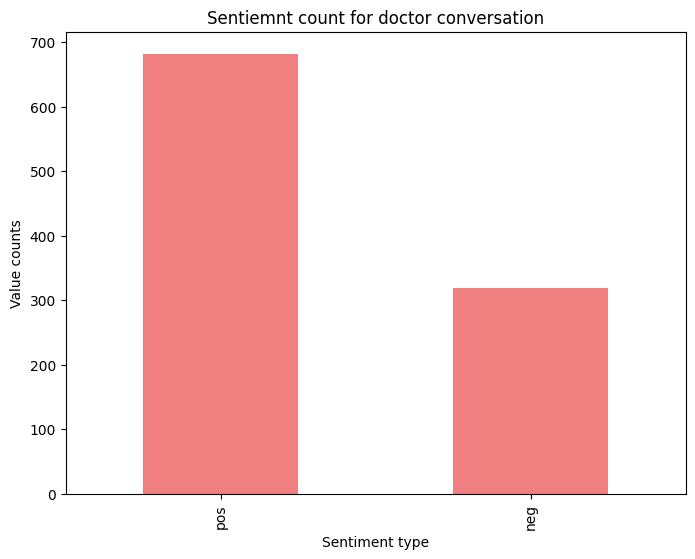

In [ ]:
plt.figure(figsize=(8,6))
sample['sentiment_label_doctor'].value_counts().plot(kind='bar', color='lightcoral')
plt.title("Sentiemnt count for doctor conversation")
plt.xlabel("Sentiment type")
plt.ylabel("Value counts")
plt.show()


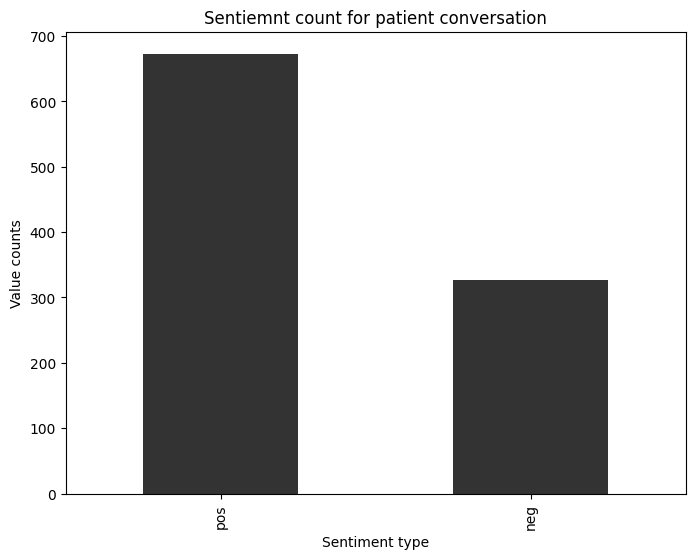

In [ ]:
plt.figure(figsize=(8,6))
sample['sentiment_label_patient'].value_counts().plot(kind='bar', color='#333')
plt.title("Sentiemnt count for patient conversation")
plt.xlabel("Sentiment type")
plt.ylabel("Value counts")
plt.show()


In [ ]:
def extract_gender(text):
    if re.search(r'\b(she|her|female|woman|girl|miss)\b', text, re.IGNORECASE):
        return 'Female'
    # Look for male-related keywords
    elif re.search(r'\b(he|his|male|man|boy|mr)\b', text, re.IGNORECASE):
        return 'Male'
    return 'Unknown'
sample['gender'] = sample['data'].apply(extract_gender)
print(sample[['data', 'gender']].head())

                                                   data  gender
1801  The third case was a 64-year-old female who ad...  Female
1190  A 34-year-old woman presented with severe epis...  Female
1817  A 53-year-old man, who had non-exertional ches...    Male
251   A 34 year old woman from the east of Morocco, ...  Female
2505  A 19-year-old male of Caucasian origin was adm...    Male


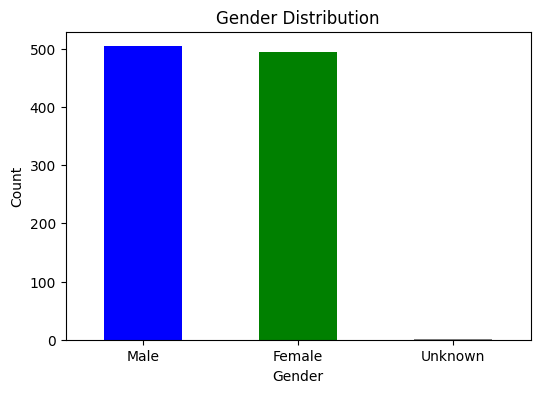

In [ ]:
gender_counts = sample['gender'].value_counts()
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['blue', 'green', 'gray'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
def extract_age(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    match = re.search(r'(\d+)\s*year', text, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return None
sample['age'] = sample['data'].apply(extract_age)

print(sample[['data', 'age']].head())

                                                   data   age
1801  The third case was a 64-year-old female who ad...  64.0
1190  A 34-year-old woman presented with severe epis...  34.0
1817  A 53-year-old man, who had non-exertional ches...  53.0
251   A 34 year old woman from the east of Morocco, ...  34.0
2505  A 19-year-old male of Caucasian origin was adm...  19.0


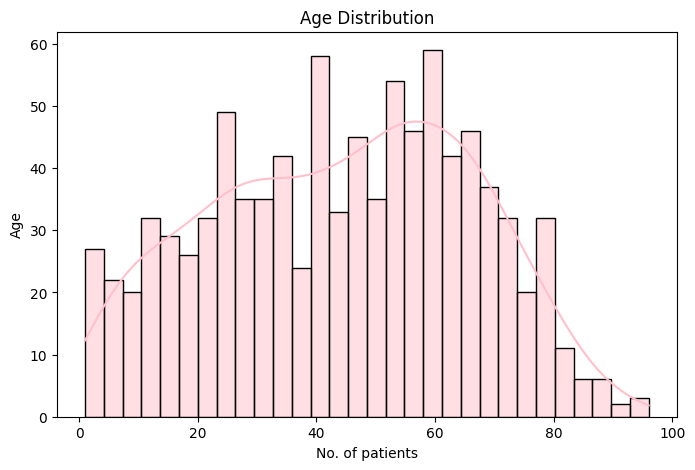

In [ ]:

plt.figure(figsize=(8, 5))
sns.histplot(sample['age'], kde=True, color='pink', bins=30)
plt.title("Age Distribution")
plt.xlabel("No. of patients")
plt.ylabel("Age")
plt.show()



<ipython-input-58-5c93e2eb3d6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='gender', y='age', data=sample, palette="Set2")


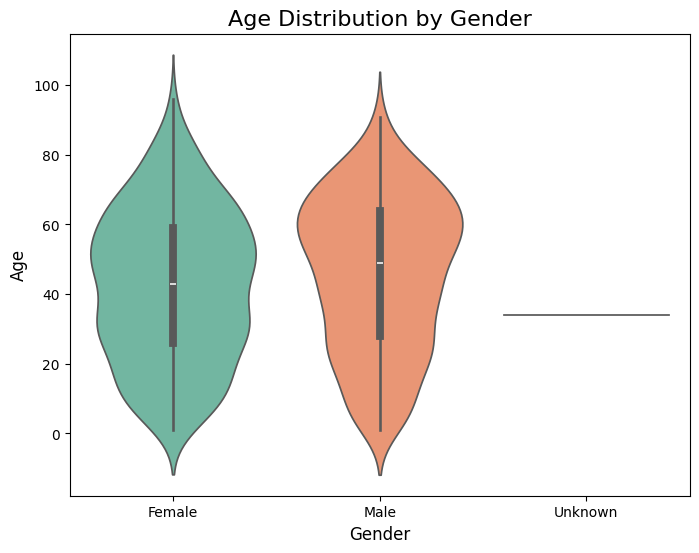

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.violinplot(x='gender', y='age', data=sample, palette="Set2")

plt.title("Age Distribution by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Age", fontsize=12)

plt.show();

<ipython-input-60-7511e8423905>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='age', data=sample, palette="Set2")


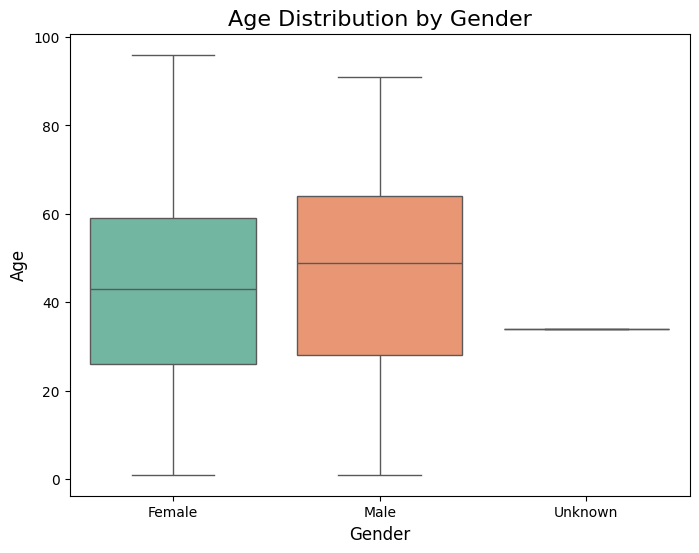

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='age', data=sample, palette="Set2")

plt.title("Age Distribution by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Age", fontsize=12)

plt.show()
